### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, ParameterGrid
from sklearn.feature_selection import RFECV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor, LogisticRegressionCV, RidgeCV

from sklearn import linear_model, ensemble

from sklearn.ensemble import StackingRegressor, VotingRegressor

### Import the Train data set and Test data set 

In [3]:
loc_train = 'data\\train.csv'
loc_test = 'data\\test.csv'

target = 'SalePrice'
evaluation = 'neg_root_mean_squared_error'

raw_train_data = pd.read_csv(loc_train)
y = raw_train_data[target]
raw_train_data = raw_train_data.drop(target, axis=1)
raw_test_data = pd.read_csv(loc_test)
raw_train_data.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,Id
0,-0.129931,-0.155586,0.672280,-0.453217,1.147933,0.929322,1.246171,0.794646,-0.365991,-1.050480,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.553114,0.142585,-0.017057,1.934108,-0.010675,-0.592154,-0.768637,1.210991,-0.365991,-0.574229,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2,0.015456,0.502563,0.672280,-0.453217,1.051643,0.857357,1.108725,0.363497,-0.365991,-0.106155,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
3,-0.381843,0.130448,0.672280,-0.453217,-1.620217,-0.822258,-0.768637,-0.375798,-0.365991,0.180128,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
4,0.720013,1.009159,1.322129,-0.453217,1.004078,0.716743,1.585134,0.704265,-0.365991,0.049879,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
y = np.log(y)

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston
# evaluation = 'neg_mean_squared_error'
# R, t = load_boston(True)
# R = pd.DataFrame(R)
# raw_train_data, raw_test_data, y, v = train_test_split(R, t, random_state=47, test_size=0.15)
# raw_train_data.head(5)

In [6]:
# pd.Series(y).describe()

In [7]:
# raw_train_data.info()

In [8]:
# raw_train_data.describe()

### Prepare the data for Machine Learning

In [9]:
def prepare(raw_DF):
    DF = raw_DF.copy()
    
    DF = DF.drop('Id', axis= 1)
    
    return DF

In [10]:
train_X = prepare(raw_train_data)
test_X = prepare(raw_test_data)

F = train_X.copy()
F['y'] = y
F.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,y
0,-0.129931,-0.155586,0.672280,-0.453217,1.147933,0.929322,1.246171,0.794646,-0.365991,-1.050480,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.247694
1,0.553114,0.142585,-0.017057,1.934108,-0.010675,-0.592154,-0.768637,1.210991,-0.365991,-0.574229,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.109011
2,0.015456,0.502563,0.672280,-0.453217,1.051643,0.857357,1.108725,0.363497,-0.365991,-0.106155,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.317167
3,-0.381843,0.130448,0.672280,-0.453217,-1.620217,-0.822258,-0.768637,-0.375798,-0.365991,0.180128,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.849398
4,0.720013,1.009159,1.322129,-0.453217,1.004078,0.716743,1.585134,0.704265,-0.365991,0.049879,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.429216


In [11]:
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 128 entries, LotFrontage to y
dtypes: float64(128)
memory usage: 1.4 MB


### Visualize

In [12]:
F.corr().abs().sort_values('y', ascending=False).y

y                   1.000000
OverallQual         0.813685
GrLivArea           0.728897
GarageCars          0.684798
GarageArea          0.651735
                      ...   
RoofMatl_Tar&Grv    0.009607
OverallCond         0.006177
GarageCond_Gd       0.005239
BsmtHalfBath        0.004477
SaleType_ConLI      0.003058
Name: y, Length: 128, dtype: float64

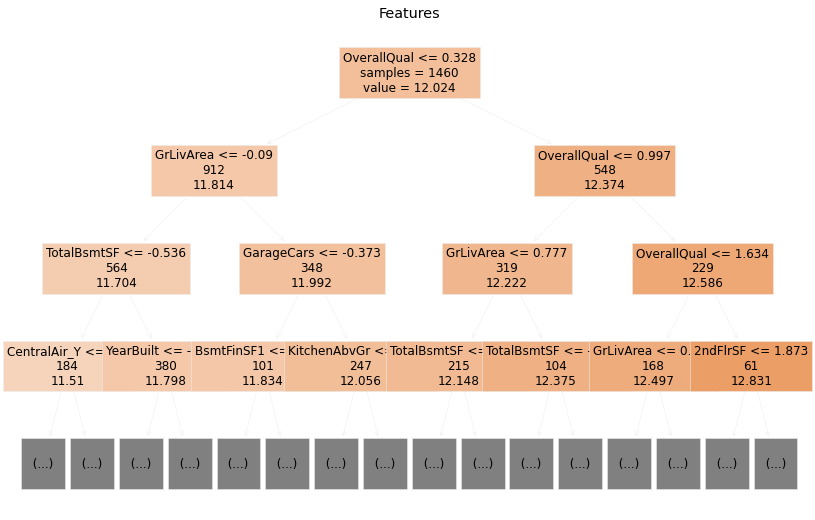

In [13]:
dt = DecisionTreeRegressor().fit(train_X, y)
plt.figure(figsize = (14, 9))
plot_tree(dt, 
          max_depth = 3, 
          filled = True, 
          fontsize=12, 
          label='root', 
          impurity=False, 
          feature_names=train_X.columns
         )
plt.title('Features')
plt.show()

### List of Regressors
https://scikit-learn.org/stable/supervised_learning.html

In [14]:
# https://scikit-learn.org/stable/supervised_learning.html

Regressors_small = [
    GradientBoostingRegressor(), 
    RidgeCV(),
    KNeighborsRegressor(), 
    RandomForestRegressor(),
    ExtraTreesRegressor(),
]

Regressors_medium = [
    linear_model.LarsCV(),
    linear_model.LassoCV(),
    linear_model.LassoLarsCV(),
    MLPRegressor(), 
    SVR(), 
    SGDRegressor(), 
    LinearSVR(),
    GaussianProcessRegressor(), 
    DecisionTreeRegressor(), 
    AdaBoostRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    
    NuSVR(),
]

### Tips on Practical Use of some classifiers

https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use


### Parameter Grid

In [15]:
# parameter tuning
gbt_parameters = {
    'n_estimators': [100, 300, 500, 700], 
    'loss': ['ls', 'lad', 'huber'], 
    'warm_start': [True]
}

knn_parameters = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance']
}

rf_parameters = {
    'n_estimators': [100, 300, 500, 700], 
    'warm_start': [True]
}

et_parameters = {
    'n_estimators': [100, 300, 500, 700], 
    'warm_start': [True]
}

ridge_parameters = {
    'scoring': [None, evaluation]
}

### Making the list of Classifiers

In [16]:
gbt_models = [GradientBoostingRegressor(**params) for params in ParameterGrid(gbt_parameters)]
knn_models = [KNeighborsRegressor(**params) for params in ParameterGrid(knn_parameters)]
et_models = [ExtraTreesRegressor(**params) for params in ParameterGrid(et_parameters)]
ridge_models = [RidgeCV(**params) for params in ParameterGrid(ridge_parameters)]
rf_models = [RandomForestRegressor(**params) for params in ParameterGrid(rf_parameters)]

In [17]:
MLA = Regressors_small
MLA = gbt_models + knn_models + et_models + ridge_models + rf_models
MLA = MLA + Regressors_medium

### Checking the accuracy of each of the Classifiers
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [18]:
paramlist = ['n_neighbors', 'n_estimators', 'final_estimator', 'weights', 'loss', 'scoring']
scoring_metrics = [evaluation]
metrics = ['fit_time'] +  ['test_'+m for m in scoring_metrics]
main_scorer = 'test_'+scoring_metrics[0]


def cv(alg, X, y):
    name = alg.__class__.__name__
    params = alg.get_params()
    imp_params = {p: params[p] for p in params if p in paramlist}
    
    score = pd.DataFrame(cross_validate(alg, X, y, scoring=scoring_metrics))
    
    df = pd.DataFrame({
        name: [alg] + 
        [score[i].mean() for i in metrics] + [score[main_scorer].std()]
        + [imp_params] 
    })
    
    return df.transpose()


def CVscoreDF(MLA, X, y):
    M = pd.DataFrame()
    for alg in MLA:
        try:
            M = M.append(cv(alg, X, y))
        except:
            continue

    M = M.rename(columns={i: c for i, c in enumerate(['models']+metrics+['std_test_score']+['params'])})
    M = M.sort_values(main_scorer, ascending = False)
    return M

In [19]:
Score = CVscoreDF(MLA, train_X, y)
Score.head(10)

,models,fit_time,test_neg_root_mean_squared_error,std_test_score,params
GradientBoostingRegressor,"GradientBoostingRegressor(loss='huber', n_esti...",2.37401,-0.120052,0.013438,"{'loss': 'huber', 'n_estimators': 300}"
GradientBoostingRegressor,"GradientBoostingRegressor(loss='huber', n_esti...",5.5454,-0.12133,0.0142658,"{'loss': 'huber', 'n_estimators': 700}"
GradientBoostingRegressor,"GradientBoostingRegressor(loss='huber', n_esti...",3.98738,-0.121348,0.0147392,"{'loss': 'huber', 'n_estimators': 500}"
GradientBoostingRegressor,"GradientBoostingRegressor(n_estimators=500, wa...",2.8032,-0.122739,0.0117246,"{'loss': 'ls', 'n_estimators': 500}"
GradientBoostingRegressor,"GradientBoostingRegressor(n_estimators=700, wa...",3.88499,-0.123293,0.0127114,"{'loss': 'ls', 'n_estimators': 700}"
GradientBoostingRegressor,"GradientBoostingRegressor(n_estimators=300, wa...",1.67698,-0.123385,0.0116914,"{'loss': 'ls', 'n_estimators': 300}"
LassoLarsCV,LassoLarsCV(),0.378798,-0.124113,0.0178852,{}
GradientBoostingRegressor,"GradientBoostingRegressor(loss='lad', n_estima...",5.07718,-0.124927,0.0100013,"{'loss': 'lad', 'n_estimators': 700}"
LassoCV,LassoCV(),0.234964,-0.125021,0.018966,{}
GradientBoostingRegressor,"GradientBoostingRegressor(loss='huber', warm_s...",0.797805,-0.126306,0.0117901,"{'loss': 'huber', 'n_estimators': 100}"


### Stack Ensembling
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

https://scikit-learn.org/stable/modules/linear_model.html

In [20]:
# List of the Classifiers to be stacked

MLAi = Score.models.head(32).to_list()
Stack_estimators = [
    (a.__class__.__name__ + str(i), a) for i, a in enumerate(MLAi)
]
Stack_estimators[:5]

[('GradientBoostingRegressor0',
  GradientBoostingRegressor(loss='huber', n_estimators=300, warm_start=True)),
 ('GradientBoostingRegressor1',
  GradientBoostingRegressor(loss='huber', n_estimators=700, warm_start=True)),
 ('GradientBoostingRegressor2',
  GradientBoostingRegressor(loss='huber', n_estimators=500, warm_start=True)),
 ('GradientBoostingRegressor3',
  GradientBoostingRegressor(n_estimators=500, warm_start=True)),
 ('GradientBoostingRegressor4',
  GradientBoostingRegressor(n_estimators=700, warm_start=True))]

In [21]:
LSstack = StackingRegressor(Stack_estimators)
LSstack.fit(train_X, y)

StackingRegressor(estimators=[('GradientBoostingRegressor0',
                               GradientBoostingRegressor(loss='huber',
                                                         n_estimators=300,
                                                         warm_start=True)),
                              ('GradientBoostingRegressor1',
                               GradientBoostingRegressor(loss='huber',
                                                         n_estimators=700,
                                                         warm_start=True)),
                              ('GradientBoostingRegressor2',
                               GradientBoostingRegressor(loss='huber',
                                                         n_estimators=500,
                                                         warm_start=True)),
                              ('Gradie...
                              ('RandomForestRegressor24',
                               RandomForestRegresso

In [22]:
Vstack = VotingRegressor(Stack_estimators)
Vstack.fit(train_X, y)

VotingRegressor(estimators=[('GradientBoostingRegressor0',
                             GradientBoostingRegressor(loss='huber',
                                                       n_estimators=300,
                                                       warm_start=True)),
                            ('GradientBoostingRegressor1',
                             GradientBoostingRegressor(loss='huber',
                                                       n_estimators=700,
                                                       warm_start=True)),
                            ('GradientBoostingRegressor2',
                             GradientBoostingRegressor(loss='huber',
                                                       n_estimators=500,
                                                       warm_start=True)),
                            ('Gradient...
                            ('RandomForestRegressor24',
                             RandomForestRegressor(n_estimators=700,
        

In [23]:
# stack_parameters = {
#     'final_estimator': [
#     linear_model.RidgeCV(), 
#     linear_model.LassoCV(), 
#     linear_model.LarsCV(), 
#     linear_model.LassoLarsCV(), 
#     linear_model.ElasticNetCV()
#     ] 
# }
# gscv = GridSearchCV(StackingRegressor(Stack_estimators), stack_parameters, scoring=evaluation, cv= 3)

In [24]:
# gscv.fit(train_X, y)
# score = pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')
# score[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].head()

## Own Stack Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [25]:
TrainedMLA  = list(Stack_estimators)
for n, alg in TrainedMLA:
    alg.fit(train_X, y)

In [26]:
lscaler = None
def level1(X):
    global lscaler
    L1 = pd.DataFrame({'temp':X.index})
    for name, alg in TrainedMLA:
        L1[name] = alg.predict(X)

    L1 = L1.drop(columns = ['temp'])
    if lscaler == None:
        lscaler = StandardScaler().fit(L1)
    L1 = lscaler.transform(L1)
    return L1
L1 = level1(train_X)

In [27]:
FLSstack = RFECV(RidgeCV(), 
                 scoring = evaluation)

In [28]:
# FLSstack.fit(L1, y)
# print ('RFECV num Features:',FLSstack.n_features_, 
#        '\nRidgeCV mean rmse:', FLSstack.grid_scores_.mean())

In [29]:
# imp_models = Score.models.head(32)[FLSstack.support_].tolist()
# Stack_estimators = [
#     (a.__class__.__name__ + str(i), a) for i, a in enumerate(MLA)
# ]

In [30]:
# Meta_models = [
#     linear_model.RidgeCV(), 
#     linear_model.LassoCV(), 
#     linear_model.LarsCV(), 
#     linear_model.LassoLarsCV(), 
#     linear_model.ElasticNetCV()
# ]
# Stacker = [StackingRegressor(Stack_estimators, final_estimator=mm) for mm in Meta_models]

In [31]:
# Stack_score = CVscoreDF(Stacker, train_X, y)
# Stack_score

### If still unsatisfied:
https://mlens.readthedocs.io/en/0.1.x/source/mlens.ensemble/

### Choose your Classifier and Predict on the test data set

In [32]:
single_Regressor = Score.models.iloc[0]
single_Regressor.fit(train_X, y)

GradientBoostingRegressor(loss='huber', n_estimators=300, warm_start=True)

In [33]:
# stack_Regressor = Stack_score.models.iloc[0]
# stack_Regressor.fit(train_X, y)

In [34]:
predictions_single = single_Regressor.predict(test_X)
predictions_stack = LSstack.predict(test_X)
predictions_vstack = Vstack.predict(test_X)
# predictions_flsstack = FLSstack.predict(level1(test_X))
# predictions_rfestack = RFEstack.predict(test_X)

In [35]:
# print ('Single:', sklearn.metrics.mean_squared_error(v, predictions_single))
# print ('Stack:', sklearn.metrics.mean_squared_error(v, predictions_stack))
# print ('Voting Stack:', sklearn.metrics.mean_squared_error(v, predictions_vstack))
# print ('Own stack:', sklearn.metrics.mean_squared_error(v, predictions_flsstack))
# print ('RFE stack:', sklearn.metrics.mean_squared_error(v, predictions_rfestack))

In [36]:
for name, predictions in [['single', predictions_single],
                    ['stack', predictions_stack],
#                     ['rfestack', predictions_rfestack],
                    ['vstack', predictions_vstack],
#                     ['flsstack', predictions_flsstack]
                         ]:
    output = pd.DataFrame({'Id': raw_test_data.Id, target: np.exp(predictions)})
    output.to_csv(f'preds\\{name}_6.csv', index = False)
output.head()

,Id,SalePrice
0,1461,122891.446303
1,1462,155995.652680
2,1463,185060.131664
3,1464,192047.789009
4,1465,188413.860009


In [37]:
import datetime
datetime.datetime.now()

datetime.datetime(2020, 8, 9, 2, 28, 40, 960493)

In [38]:
sklearn.metrics.mean_squared_error(y, single_Regressor.predict(train_X))**0.5

0.06441673152875382

In [39]:
sklearn.metrics.mean_squared_error(y, LSstack.predict(train_X))**0.5

0.05806552948025807

In [40]:
sklearn.metrics.mean_squared_error(y, Vstack.predict(train_X))**0.5

0.05134643279562087